# Integrantes:

* Sergio Aldana
* Andres David Betancourt
* Juan Herrera
* Luis Eduardo Bonilla

In [11]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display, HTML

# Análisis preliminar de datos
cancer = pd.read_csv('sample_data/haberman - haberman.csv')

print(cancer.shape)
print(cancer.head(310))

(306, 4)
     age  year_operation  nodes_detected  over_5_years
0     30              64               1             1
1     30              62               3             1
2     30              65               0             1
3     31              59               2             1
4     31              65               4             1
..   ...             ...             ...           ...
301   75              62               1             1
302   76              67               0             1
303   77              65               3             1
304   78              65               1             2
305   83              58               2             2

[306 rows x 4 columns]


<AxesSubplot:xlabel='nodes_detected', ylabel='over_5_years'>

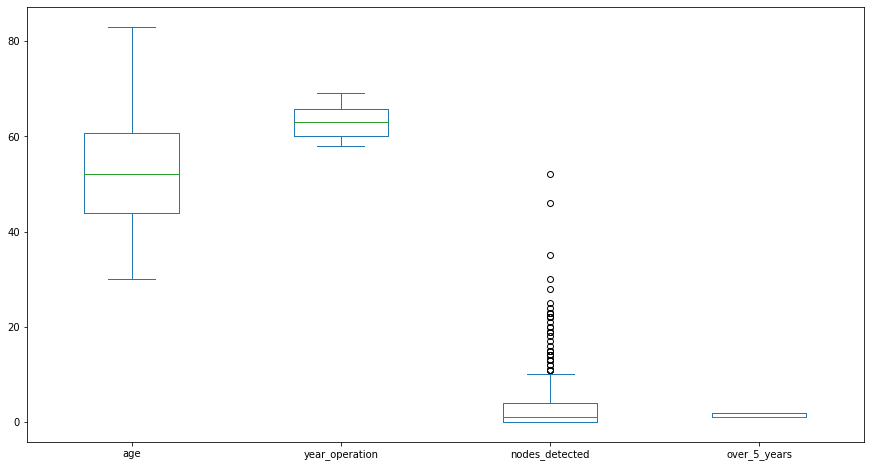

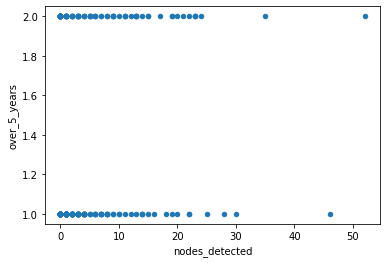

In [12]:
cancer.plot.box(figsize = (15, 8))
cancer.describe()
cancer.plot.scatter(x='nodes_detected',y='over_5_years')


### **Preparación de los datos**

In [13]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
# split training and text data
x=cancer['age'].values.reshape(-1,1)
u=cancer['year_operation'].values.reshape(-1,1)
z=cancer['nodes_detected'].values.reshape(-1,1)
y=cancer['over_5_years'].values.reshape(-1,1)
#TODO: use train_test_split
x_train, x_test, y_train, y_test, z_train, z_test, u_train, u_test = train_test_split(x,y,z,u, test_size=0.2, random_state=4200) 

In [14]:
x_train.shape

(244, 1)

# **Modeling**

In [15]:
n=x_train.shape[0]
uno=np.ones((n,1))
Phi=np.concatenate((x_train,uno), axis=1)
Phi.shape

(244, 2)

In [16]:

inversa= np.linalg.inv(np.matmul(Phi.T,Phi))
theta= np.matmul(inversa,np.matmul(Phi.T,y_train))
theta

array([[0.00204009],
       [1.1597819 ]])

In [17]:
import numpy as np
def linear_regressor(Phi, theta):
  return np.matmul(Phi, theta)

def cost_function(y, y_hat, n):
  return np.sum(np.square(y-y_hat))/n
  
def gradient(Phi, y, y_hat, n):
  return (2.0/n)*np.matmul(Phi.T, y_hat-y)

In [18]:
def fit_params(Phi, y, theta,learning_rate = 0.2e-2,tol=1e-5,max_iterations=10000):
    #TODO: implement the cost and gradient functions
    costs = [np.inf]
    n=Phi.shape[0]
    for i in range(0, max_iterations):
        y_hat=linear_regressor(Phi,theta)  
        my_cost = cost_function(y,y_hat,n)
        if abs(my_cost - costs[-1]) < tol:
            break
        else:
            my_gradient = gradient(Phi, y, y_hat, n)
            theta = theta - learning_rate * my_gradient
            costs.append(my_cost)           
    return theta, costs

In [19]:
new_t = np.random.normal(size=(2,1 )).astype(np.float32)
print(new_t)
theta_hat, outcost = fit_params(Phi,y_train,new_t,learning_rate = .5e-2)
theta_hat

[[1.1607102 ]
 [0.47524616]]


C:\Users\Maestro\AppData\Local\Temp\ipykernel_2940\582242566.py:6: RuntimeWarning: overflow encountered in square
  return np.sum(np.square(y-y_hat))/n
C:\Users\Maestro\AppData\Local\Temp\ipykernel_2940\1752444171.py:8: RuntimeWarning: invalid value encountered in double_scalars
  if abs(my_cost - costs[-1]) < tol:
C:\Users\Maestro\AppData\Local\Temp\ipykernel_2940\582242566.py:9: RuntimeWarning: overflow encountered in matmul
  return (2.0/n)*np.matmul(Phi.T, y_hat-y)
C:\Users\Maestro\AppData\Local\Temp\ipykernel_2940\1752444171.py:12: RuntimeWarning: invalid value encountered in subtract
  theta = theta - learning_rate * my_gradient


array([[nan],
       [nan]])

Text(0.5, 1.0, 'cancer')

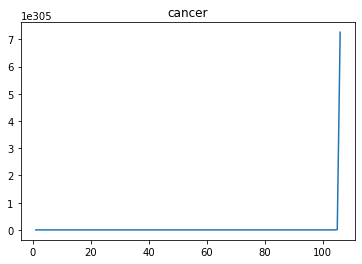

In [20]:
import matplotlib.pyplot as plt

plt.plot(outcost)
plt.title('cancer')

In [21]:
regr= linear_model.LinearRegression()

regr.fit(x_train,y_train)

print('Coefficients: ', regr.coef_)
print('Intercept: ', regr.intercept_)

Coefficients:  [[0.00204009]]
Intercept:  [1.1597819]


In [22]:
from sklearn.metrics import accuracy_score,median_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score,mean_squared_log_error,explained_variance_score


def test_model(e,y_test,regr):
  #prediction
  y_pred=regr.predict(e)
  ##graficas

  plt.scatter(e, y_test,  color='black')
  plt.plot(e, y_pred, color='blue',linewidth=3)
  plt.xlabel('input')
  plt.ylabel('output')


 
  print('{0:30} | {1:9.2f}'.format('regressor score', regr.score(e,y_test)))
  print('{0:30} | {1:9.2f}'.format('Mean squared error', np.mean((y_pred - y_test) ** 2)))
  print('{0:30} | {1:9.2f}'.format('Mean absolute error', np.mean(y_test - y_pred)))



regressor score                |     -0.03
Mean squared error             |      0.20
Mean absolute error            |      0.09


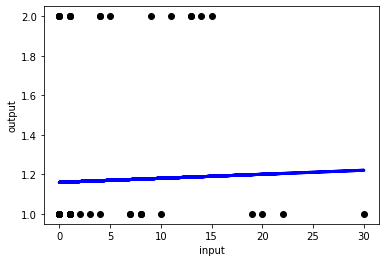

In [23]:
  test_model(z_test,y_test,regr)

# Implementacion

In [24]:
def conversor(y):
  return regr.predict(y)

In [25]:
import pickle #for save the model

name_file='water_lab.pkl'
myfile = open(name_file, 'wb')
pickle.dump(regr,myfile)
myfile.close()

In [26]:
import pickle #for save the model
def conversor(y,model_file):
  # load the model with the trained model 
  ## example, this function can be a web server in django 
  new_file = open(model_file, 'rb')
  clf2 = pickle.load(new_file)
  #TODO: use predict of the regressor
  y_= clf2.predict(y)
  return y_

y_=conversor(np.array([5]).reshape(1,1),'water_lab.pkl')
# after this point a lot of data engineering would be required...
print(y_)

[[1.16998236]]


In [28]:
!pip install flask-ngrok

In [ ]:
from flask_ngrok import run_with_ngrok
from flask import Flask
from flask import request, jsonify
import pickle

model_file='water_lab.pkl'
new_file = open(model_file, 'rb')
clf2 = pickle.load(new_file)
app = Flask(__name__)

run_with_ngrok(app)   #starts ngrok when the app is run
@app.route("/")
def home():
    return '<h1>This is an api of our machine learning model!</h1> Try api/lab?x=5. <a href="api/lab?x=5">example</a>'

@app.route('/api/lab', methods=['GET'])
def api_id():
    # Check if an x was provided as part of the URL.
    if 'y' in request.args:
        y = int(request.args['y'])
    else:
        return "Error: No id field provided. Please specify the value y."
    a=clf2.predict(np.array([y]).reshape(1,1))[0][0]
    return jsonify(a)
app.run()

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score


regressors = [linear_model.LinearRegression(),linear_model.Ridge(alpha=.7),
              MLPRegressor(hidden_layer_sizes=(22,100,),activation='relu',max_iter=100000),
              linear_model.RANSACRegressor(random_state=0)]
names = ['lineal','ridge 0.7','MLP','RANSAC']
#from https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
scoring =['explained_variance',
          'neg_mean_absolute_error',
          'neg_mean_squared_error',
          'neg_mean_squared_log_error',
          'neg_median_absolute_error',
          'r2']



for reg,name in zip(regressors,names):
    scores = cross_val_score(reg, z_train, y_train.ravel(), scoring=scoring[5],
                            cv=5)
    print('--------------------------------------')
    print('model {0:20} | score {1:20}'.format(name,scoring[5]))
    print('mean {0:22.2f}| std   {1:<22.2f}'.format(scores.mean(),scores.std()))
    print("Accuracy(95.7%): {0:23.2f} (+/- {1:.2f})" .format(scores.mean(), scores.std() * 2))

In [ ]:
#after this point repeat test and implementation process whith the best model.
model=regressors[2].fit(z_train,y_train.ravel())
test_model(z_test,y_test,model)